In [47]:
# Class: COEN 140 Lab Machine Learning/Data Mining
# Name: Matthew Davenport
# Date: 9/25/2022
# Title: Lab 8 – K-Means Clustering

import numpy as np
import math

# as directed by lab doc:
num_of_clusters = 10
num_of_initializations = 15

In [48]:
import pickle
from sklearn.datasets import fetch_openml

try: 
    with open("data.pickle", "rb") as fp:
        X_training = pickle.load(fp)
    print("File unpickled successfully")

except FileNotFoundError:
    mnist = fetch_openml('mnist_784', version=1)
    X_training = mnist["data"][:2000]
    
    with open("data.pickle", "wb") as fp:
        pickle.dump(X_training, fp)

print(X_training.shape)

File unpickled successfully
(2000, 784)


my_kmeans performs a k-means clustering of the 2000 images of digits.
Takes 3 arguments

data: the data matrix

K: the number of clusters

M: the number of initializations

Returns: 

(1) the K centroids and cluster assignments for the best solution with the lowest loss 
function (recall that the k-means loss function is the sum of the squared distances of 
observations from their assigned means) 

(2) the sequence of values of the loss-function over k-means iterations for the best solution 
(this should be non-increasing) 

(3) the set of M terminal loss-function values for all initializations   


In [45]:
from matplotlib import pyplot as plt
def my_kmeans(data, K, M):
    # return lists: 
    return_clusters = []      # holds clusters to be returned 
    return_centroids = []     # centroids to be returned 
    return_losses = [] 
    return_final_losses = []  # final losses realized
    
    data_size = len(data)     # number of points in our dataset
    
    mean_square_errors = []   # list of mean square errors realized
    
    data = np.asarray(data)    # convert data to np array
    
    # M initializations
    for i in range(M): 
        
        initializations = np.random.choice(2000, K, replace=False) # different inits per M iterations
        print(len(initializations))
        
        closest_clusters = np.zeros(data_size)
        temp_losses = []
        
        # initialize centroids list with random points from initializations
        centroids = []
        for n in initializations:
            centroids.append(data[n])
        centroids = np.asarray(centroids)
        print(len(centroids))
        
        #kmeans algorithm loop: 
        convergence = False
        while not convergence: 
            for k in range(data_size):
                # compute euclidean distance for each point in data to each centroid
                euclidean_distances = []
                for x in range(K):
                    euclidean_distances.append(np.linalg.norm(data[k] - centroids[x]))
                # find the min euclidean distance to find which cluster point belongs to
                closest_cluster = euclidean_distances.index(min(euclidean_distances)) 
                closest_clusters[k] = closest_cluster               
                
            prev_centroids = np.copy(centroids) # temp copy of the previous array of centroids for comparisons
            
            loss_val = 0
            
            for l in range(K):
                cluster_points = []
                for m in range(data_size):
                    if closest_clusters[m] == l:
                        cluster_points.append(data[m])
                        
                centroids[l] = np.mean(cluster_points, axis=0)
                for point in cluster_points:
                    loss_val += np.linalg.norm(point - centroids[l])
            print("Loss Val: ", loss_val)
            temp_losses.append(loss_val)
            
            # once centroids converge, we can exit out of loop. check with copy of previous centroids 
            if np.all(np.equal(prev_centroids, centroids)):
                convergence = True
        
        # update mean square errors with the loss value of the current iteration:        
        mean_square_errors.append(loss_val)
        # updating return lists: 
        return_centroids.append(centroids)
        return_clusters.append(closest_clusters)
        return_losses.append(loss_val)
        return_final_losses.append(temp_losses[-1])
        
        
        # Plotting per iteration:
        print("Plot for iteration: ", (i + 1))
        plt.plot(temp_losses)
        plt.show()
        
    # Mean square error plots: 
    print("Mean Square Error: ")
    iteration = list(range(0, M))
    plt.plot(iteration, mean_square_errors)
    plt.show()
    
    minimum = return_final_losses.index(min(return_final_losses))
    return [return_centroids[minimum], return_clusters[minimum], return_losses[minimum], return_final_losses]


15
15
Loss Val:  3177421.1153328693
Loss Val:  3089780.1889604586
Loss Val:  3063047.956618177
Loss Val:  3048004.3565544174
Loss Val:  3042413.3527952842
Loss Val:  3040300.736759826
Loss Val:  3038673.4964771015
Loss Val:  3036686.58302348
Loss Val:  3034468.369796046
Loss Val:  3031777.369698478
Loss Val:  3029284.9918267955
Loss Val:  3025500.9357847013
Loss Val:  3020924.6561362906
Loss Val:  3017150.7921628766
Loss Val:  3013380.905888982
Loss Val:  3010437.9150113054
Loss Val:  3007603.092767816
Loss Val:  3005706.4166867402
Loss Val:  3003783.8008720614
Loss Val:  3000337.7486481043
Loss Val:  2996156.3339011534
Loss Val:  2991915.5187119716
Loss Val:  2989989.070773699
Loss Val:  2988851.080486387
Loss Val:  2988404.065008743
Loss Val:  2987905.4055126444
Loss Val:  2987576.1834755316
Loss Val:  2987411.655760198
Loss Val:  2987056.02301496
Loss Val:  2986543.0178315965
Loss Val:  2986025.5766288703
Loss Val:  2985438.2346392306
Loss Val:  2984946.1616376033
Loss Val:  2984527

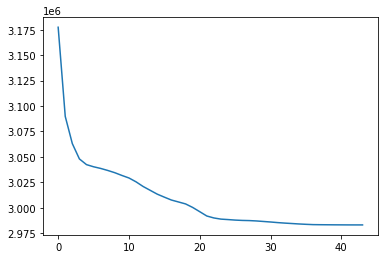

15
15
Loss Val:  3190412.619467485
Loss Val:  3105168.506486376
Loss Val:  3076720.2733486695
Loss Val:  3055323.7547011436
Loss Val:  3040578.544298709
Loss Val:  3031715.796940479
Loss Val:  3026293.269435749
Loss Val:  3021104.3715771204
Loss Val:  3016567.9794019586
Loss Val:  3013240.9282836425
Loss Val:  3010538.5586067643
Loss Val:  3007895.5377046247
Loss Val:  3005565.0453524278
Loss Val:  3004023.0133078313
Loss Val:  3002610.9516414627
Loss Val:  3001251.1255161543
Loss Val:  2999895.1758301044
Loss Val:  2998650.5483195125
Loss Val:  2997640.4568916536
Loss Val:  2996611.831611814
Loss Val:  2996093.3260134873
Loss Val:  2995862.765817244
Loss Val:  2995661.0511924736
Loss Val:  2995469.8270983803
Loss Val:  2995321.726320672
Loss Val:  2995217.444312418
Loss Val:  2995128.1347455843
Loss Val:  2995105.9609129387
Loss Val:  2995105.9609129387
Plot for iteration:  2


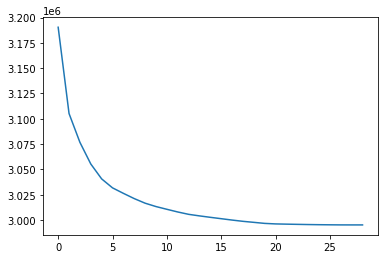

15
15
Loss Val:  3121172.1210108283
Loss Val:  3042031.4420771543
Loss Val:  3013183.926423128
Loss Val:  3001487.4770444976
Loss Val:  2996098.4024224784
Loss Val:  2992046.6267073867
Loss Val:  2989971.5296654007
Loss Val:  2989190.7396814497
Loss Val:  2988515.1622204613
Loss Val:  2987965.0705540134
Loss Val:  2987455.8353219535
Loss Val:  2986894.0571419206
Loss Val:  2986312.8278644937
Loss Val:  2985605.5003774017
Loss Val:  2984798.140611856
Loss Val:  2983680.1171685923
Loss Val:  2982465.0039636646
Loss Val:  2980641.295362109
Loss Val:  2978076.94166117
Loss Val:  2975765.436222492
Loss Val:  2974934.3234258774
Loss Val:  2974572.2776315906
Loss Val:  2974499.2097660755
Loss Val:  2974488.129544842
Loss Val:  2974475.326906773
Loss Val:  2974420.5169623834
Loss Val:  2974420.5169623834
Plot for iteration:  3


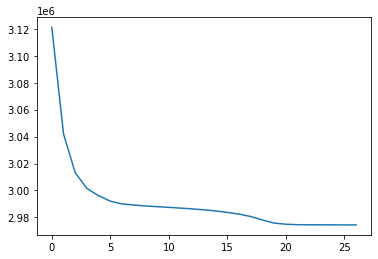

15
15
Loss Val:  3142464.237881964
Loss Val:  3082632.8407581127
Loss Val:  3063559.544599503
Loss Val:  3043081.138358521
Loss Val:  3026278.9415474143
Loss Val:  3014609.932472563
Loss Val:  3007085.8805389833
Loss Val:  3000693.7289794115
Loss Val:  2996672.186406683
Loss Val:  2994356.8605777556
Loss Val:  2992881.5058387187
Loss Val:  2992062.9687032895
Loss Val:  2991697.299031932
Loss Val:  2991475.7360602915
Loss Val:  2991363.784849844
Loss Val:  2991245.881739769
Loss Val:  2991010.3512092596
Loss Val:  2990700.6241553323
Loss Val:  2990435.8711916725
Loss Val:  2990058.9223040394
Loss Val:  2989847.706323807
Loss Val:  2989765.376351897
Loss Val:  2989646.7202415485
Loss Val:  2989566.191561043
Loss Val:  2989430.349379109
Loss Val:  2989280.263345211
Loss Val:  2989190.741481531
Loss Val:  2989169.8368923753
Loss Val:  2989169.8368923753
Plot for iteration:  4


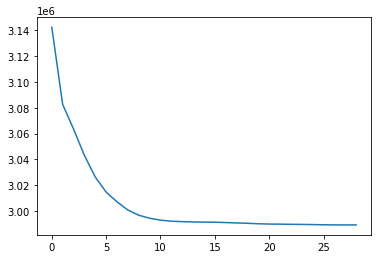

15
15
Loss Val:  3192224.4819607036
Loss Val:  3107917.5679299072
Loss Val:  3072717.87050581
Loss Val:  3055840.043426572
Loss Val:  3044634.9842863353
Loss Val:  3036269.939729696
Loss Val:  3028196.5976481526
Loss Val:  3019264.8390597734
Loss Val:  3012315.1073917896
Loss Val:  3007529.192186801
Loss Val:  3003551.715736769
Loss Val:  2999504.2479385366
Loss Val:  2995557.760032536
Loss Val:  2992416.706165504
Loss Val:  2990491.6539438767
Loss Val:  2988435.758238506
Loss Val:  2986292.612880322
Loss Val:  2984814.699404558
Loss Val:  2984039.194506029
Loss Val:  2983466.851269718
Loss Val:  2983184.1582196886
Loss Val:  2982906.9175892146
Loss Val:  2982824.472713157
Loss Val:  2982699.280881638
Loss Val:  2982620.0437920736
Loss Val:  2982620.0437920736
Plot for iteration:  5


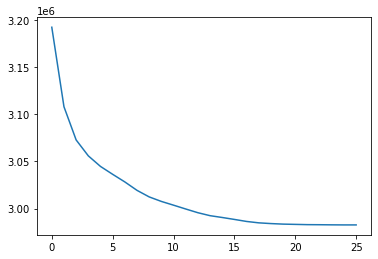

15
15
Loss Val:  3196091.9839133606
Loss Val:  3083336.630658329
Loss Val:  3054456.132997924
Loss Val:  3030901.8450395865
Loss Val:  3013628.725227576
Loss Val:  3005218.5692748874
Loss Val:  3001422.329246175
Loss Val:  2999774.4310260955
Loss Val:  2998721.562229278
Loss Val:  2997736.684171329
Loss Val:  2996685.258228408
Loss Val:  2996037.587733331
Loss Val:  2995604.2535710423
Loss Val:  2995267.023292196
Loss Val:  2994957.784948967
Loss Val:  2994867.490109942
Loss Val:  2994880.398042118
Loss Val:  2994880.398042118
Plot for iteration:  6


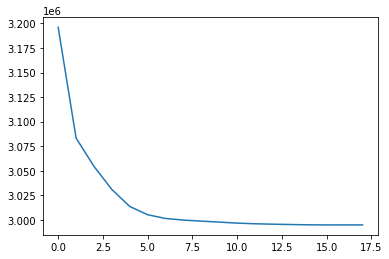

15
15
Loss Val:  3210153.6271738294
Loss Val:  3115519.449720839
Loss Val:  3073982.6953473883
Loss Val:  3036405.973176664
Loss Val:  3011697.769454513
Loss Val:  2999481.6580221755
Loss Val:  2994494.756045065
Loss Val:  2990987.7272493667
Loss Val:  2988442.8037363957
Loss Val:  2986472.6179444264
Loss Val:  2985237.167732836
Loss Val:  2984125.114600312
Loss Val:  2983445.9748372855
Loss Val:  2983105.6587400255
Loss Val:  2982856.9575762325
Loss Val:  2982381.14408539
Loss Val:  2981792.3350957884
Loss Val:  2981391.857697515
Loss Val:  2981271.751193292
Loss Val:  2981179.9670557273
Loss Val:  2981112.5709865927
Loss Val:  2981019.152071368
Loss Val:  2980921.449162595
Loss Val:  2980711.4168803976
Loss Val:  2980584.8327487726
Loss Val:  2980454.544152392
Loss Val:  2980280.043988147
Loss Val:  2979977.1379142585
Loss Val:  2979722.2507633157
Loss Val:  2979486.383475756
Loss Val:  2979363.254670324
Loss Val:  2979254.7672422994
Loss Val:  2979049.631930628
Loss Val:  2978964.16

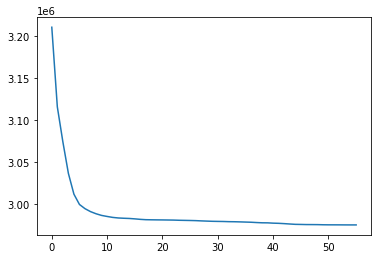

15
15
Loss Val:  3173256.728290028
Loss Val:  3083346.4017730714
Loss Val:  3047434.4893179755
Loss Val:  3020944.5911006466
Loss Val:  3001446.2707394036
Loss Val:  2994286.048506962
Loss Val:  2989068.8231798247
Loss Val:  2984298.9163226853
Loss Val:  2981092.808723653
Loss Val:  2979947.7397972783
Loss Val:  2979078.972098492
Loss Val:  2978433.804212485
Loss Val:  2977866.9230398466
Loss Val:  2977294.614392715
Loss Val:  2976860.826326135
Loss Val:  2976692.9138177694
Loss Val:  2976666.8527864674
Loss Val:  2976658.393949771
Loss Val:  2976658.393949771
Plot for iteration:  8


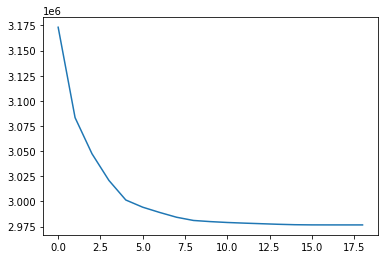

15
15
Loss Val:  3214624.5975244017
Loss Val:  3094976.5843248097
Loss Val:  3053701.301834465
Loss Val:  3034710.066808471
Loss Val:  3022700.6476991638
Loss Val:  3012115.4824969633
Loss Val:  3005264.0325277527
Loss Val:  3000778.819357882
Loss Val:  2998391.2946948768
Loss Val:  2997302.855656637
Loss Val:  2995953.350647928
Loss Val:  2994180.8909157803
Loss Val:  2992004.8190538576
Loss Val:  2990563.3720565443
Loss Val:  2989356.439655746
Loss Val:  2988678.317516279
Loss Val:  2988042.4512056415
Loss Val:  2987416.0479823244
Loss Val:  2987131.620973388
Loss Val:  2986980.3235166054
Loss Val:  2986843.992850111
Loss Val:  2986695.3367897966
Loss Val:  2986522.0211123074
Loss Val:  2986274.0218000123
Loss Val:  2986150.922584102
Loss Val:  2986059.872487793
Loss Val:  2985845.9308536868
Loss Val:  2985594.1554627335
Loss Val:  2985219.538229691
Loss Val:  2984598.8292753017
Loss Val:  2984033.350988913
Loss Val:  2983415.7818239676
Loss Val:  2983022.511130555
Loss Val:  2982849

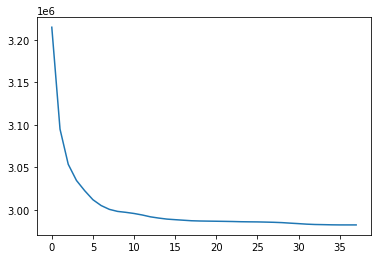

15
15
Loss Val:  3229885.0269811735
Loss Val:  3110169.4651855663
Loss Val:  3059076.9260422788
Loss Val:  3031462.399156162
Loss Val:  3014753.0656035114
Loss Val:  3007171.66044424
Loss Val:  3003045.4004757693
Loss Val:  2999329.7785286405
Loss Val:  2993865.1160225947
Loss Val:  2988582.334704968
Loss Val:  2986142.029305651
Loss Val:  2984679.8284790237
Loss Val:  2983440.3343802528
Loss Val:  2982368.8047417784
Loss Val:  2981490.705705336
Loss Val:  2980882.2727399757
Loss Val:  2980487.3095630934
Loss Val:  2980317.4882150316
Loss Val:  2980222.38083098
Loss Val:  2980206.6865749885
Loss Val:  2980118.2497739154
Loss Val:  2980033.4129699836
Loss Val:  2979989.5014564814
Loss Val:  2979931.984017415
Loss Val:  2979908.247075192
Loss Val:  2979901.485231191
Loss Val:  2979901.485231191
Plot for iteration:  10


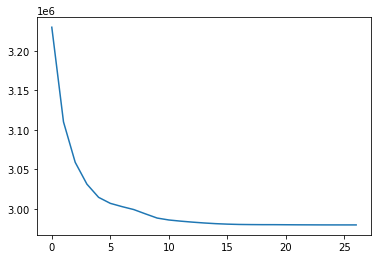

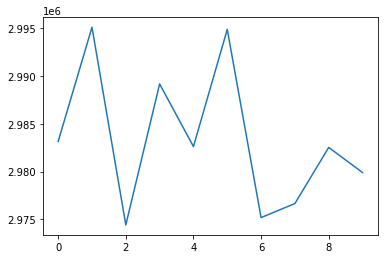

In [46]:
km_list = []
km_list = my_kmeans(X_training, num_of_initializations, num_of_clusters)

